In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [65]:
path = '/home/hkhachatrian/mae/predictions/joint/eval_dinov2_joint_ade20k_patches_224_knn_train_600_val_300.npy'
preds = np.load(path, allow_pickle=True)

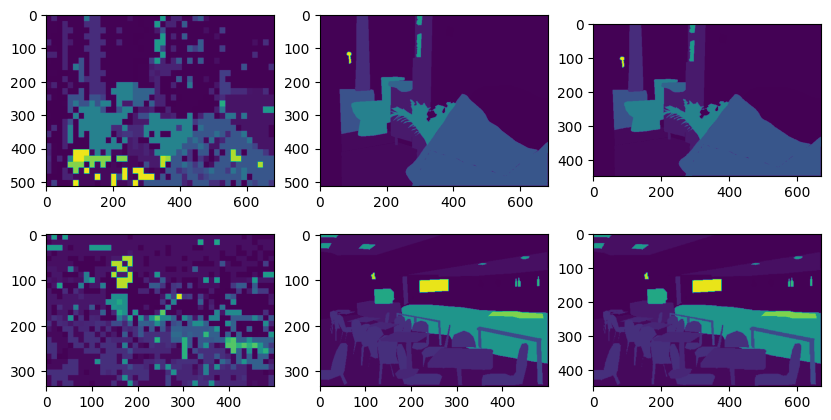

In [71]:
i += 2


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axes[0][0].imshow(preds[i-1]['patch_labels'], vmax=150)
axes[0][1].imshow(preds[i-1]['mask'], vmax=150)
axes[0][2].imshow(preds[i-1]['black_image'], vmax=150)

axes[1][0].imshow(preds[i]['patch_labels'], vmax=150)
axes[1][1].imshow(preds[i]['mask'], vmax=150)
axes[1][2].imshow(preds[i]['black_image'], vmax=150)

In [53]:
preds[i]['mask'].shape

(512, 768)

In [55]:
preds[i]['patch_labels'].shape

(512, 683)

### Variance analysis


In [75]:
ls /mnt/lwll/lwll-coral/hrant/embeddings/ade20k_patches_224

dino_train_embeds.npy    ibot_train_labels.npy    simmim_train_labels.npy
dino_train_labels.npy    ibot_val_embeds.npy      simmim_val_embeds.npy
dinov2_train_embeds.npy  ibot_val_labels.npy      simmim_val_labels.npy
dinov2_train_labels.npy  mae_train_embeds.npy     sup_vit_train_embeds.npy
dinov2_val_embeds.npy    mae_train_labels.npy     sup_vit_train_labels.npy
dinov2_val_labels.npy    mae_val_embeds.npy       sup_vit_val_embeds.npy
dino_val_embeds.npy      mae_val_labels.npy       sup_vit_val_labels.npy
dino_val_labels.npy      predictions_knn/
ibot_train_embeds.npy    simmim_train_embeds.npy


In [79]:
embeds = np.load('/mnt/lwll/lwll-coral/hrant/embeddings/ade20k_patches_224/mae_train_embeds.npy', allow_pickle=True)
variance_dinov2 = np.var(embeds, axis=0)

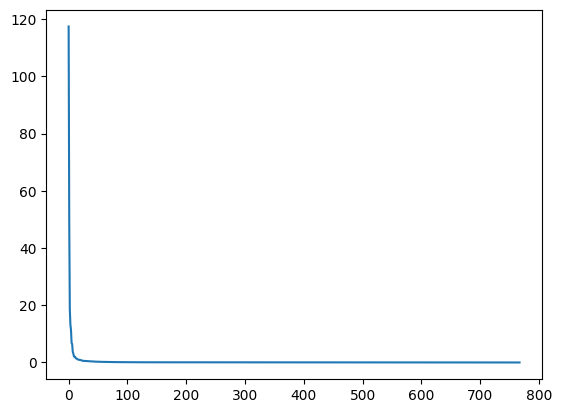

In [80]:
plt.plot(np.sort(variance_dinov2)[::-1])

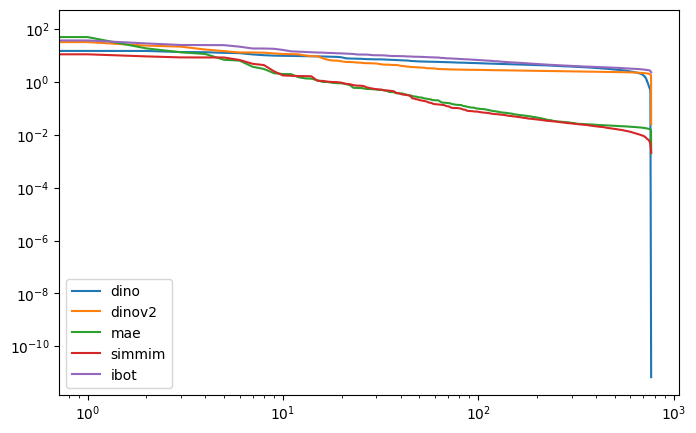

In [89]:
plt.figure(figsize=(8, 5))
models = ['dino', 'dinov2', 'mae', 'simmim', 'ibot']
for model in models:
    tmp_embeds = np.load(f'/mnt/lwll/lwll-coral/hrant/embeddings/ade20k_patches_224/{model}_train_embeds.npy', allow_pickle=True)
    tmp_variance = np.var(tmp_embeds, axis=0)
    plt.plot(np.sort(tmp_variance)[::-1], label=model)

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

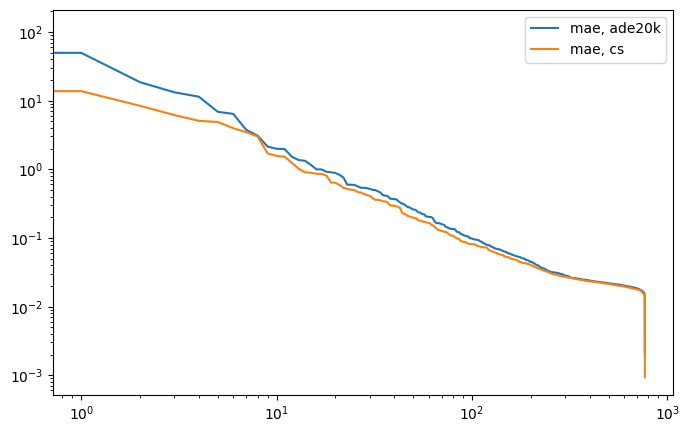

In [91]:
plt.figure(figsize=(8, 5))
model = 'mae' #, 'dinov2', 'mae', 'simmim', 'ibot']

ade_embeds = np.load(f'/mnt/lwll/lwll-coral/hrant/embeddings/ade20k_patches_224/{model}_train_embeds.npy', allow_pickle=True)
ade_variance = np.var(ade_embeds, axis=0)
plt.plot(np.sort(ade_variance)[::-1], label=f'{model}, ade20k')

cs_embeds = np.load(f'/mnt/lwll/lwll-coral/hrant/embeddings/cs_patches_256/layers/{model}_cs4pc_256_train_12_embeds.npy', allow_pickle=True)
cs_variance = np.var(cs_embeds, axis=0)
plt.plot(np.sort(cs_variance)[::-1], label=f'{model}, cs')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

In [108]:
embeds_ids = np.load(f'../varianceAnalysis/{model}_sorted_features.npy')

embeds_ids_f1m = np.load(f'../varianceAnalysis/mae_sorted_features_f1m.npy')

In [109]:
embeds_ids[:200]

array([614, 158, 508, 420, 147, 113, 539, 599,  18, 288, 495, 626, 285,
       390, 168, 371,  13, 512, 297, 192, 658, 203,   2, 577, 581,  49,
       298, 353, 479,  62,   0, 389, 148, 757, 544, 557, 126,  44,  55,
       396, 623, 500, 279,  75, 340, 687, 510, 707, 748, 119, 296, 153,
        42, 612, 653,   6, 309, 733, 474, 606, 570, 676, 195, 295, 135,
       172, 260, 532,  58, 207, 201, 729, 303,  17, 197, 634,  54, 185,
       427, 379, 493, 198,  86, 244, 706,  40, 330, 196,  23, 286, 416,
       485, 115, 635, 150, 602, 306, 199, 702, 385, 388, 387, 664, 312,
       533,   3, 386, 315, 578, 470, 655, 258, 393, 766, 122,  51, 486,
       579, 151, 582, 339, 437,   9, 368, 651, 218, 598, 468,   5, 378,
       448,   8,  50, 585, 217, 248,  26, 760, 224, 200,   4, 601, 271,
       728,  46, 266, 127, 222, 177, 102, 321, 749, 262, 472, 525, 716,
       659, 405, 310, 752, 647, 209, 176, 617, 124, 401, 338, 188, 615,
       179, 272, 633, 425, 587, 501, 138, 649, 528, 520, 369, 13

In [116]:
x1 = set(embeds_ids[:200])
x2 = set(np.argsort(ade_variance)[::-1][:200])
x3 = set(embeds_ids_f1m[:200])

In [115]:
X_f1m_mae = np.load('/mnt/lwll/lwll-coral/hrant/embeddings/fair1m/mae_224_8shot_embeddings.npy', allow_pickle=True)
variance_f1m_mae = np.var(X_f1m_mae, axis=0)

embeds_ids_f1m = np.argsort(variance_f1m_mae)[::-1]

In [122]:
x1-x2, x2-x1

({383, 443, 576, 649}, {144, 174, 583, 620})

In [123]:
x1-x3, x3-x1

({50, 443, 501, 576, 649}, {19, 41, 144, 174, 583})

In [124]:
x2-x3, x3-x2

({50, 501, 620}, {19, 41, 383})

In [120]:
x3-x2

{19, 41, 383}

In [121]:
x2-x1

{144, 174, 583, 620}

In [97]:
ade_variance[158]

117.4251

In [107]:
np.save(f'../varianceAnalysis/{model}_sorted_features_ade20k.npy', np.argsort(ade_variance)[::-1])